In [40]:
import numpy as np
import math
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

In [166]:
def low_variance_sampler(prev_particles,weights):
    particles = np.empty(shape=prev_particles.shape)
    m = particles.shape[0]
    r = np.random.uniform(low=0.0,high=1/m)
    c = weights[0]
    i = 0
    for j in range(m):
        u = r + j/m
        while u>c:
            i+=1
            c+=weights[i]
        #print("Chose {0} due to u = {1}, c = {2}".format(i,u,c))
        particles[j] = prev_particles[i]
    return particles

In [119]:
def sample_motion_model(control,particle):
    delta_t = 1
    A = np.array([[1,delta_t],[0,1]])
    B = np.array([[0.5 * delta_t ** 2],[delta_t]])
    C = np.array([1,0])
    R = np.array([[0.25 * delta_t ** 4, 0.5 * delta_t ** 3],[0.5 * delta_t ** 3, delta_t ** 2]]) # state noise
    
    particle = A.dot(particle) + np.reshape(B.dot(control),(-1,1))

    x = np.random.normal(loc=particle[0],scale=0.2)
    x_dot = np.random.normal(loc=particle[1],scale=0.05)
    particle = np.array([[x],[x_dot]])
    return np.reshape(particle,(1,-1))

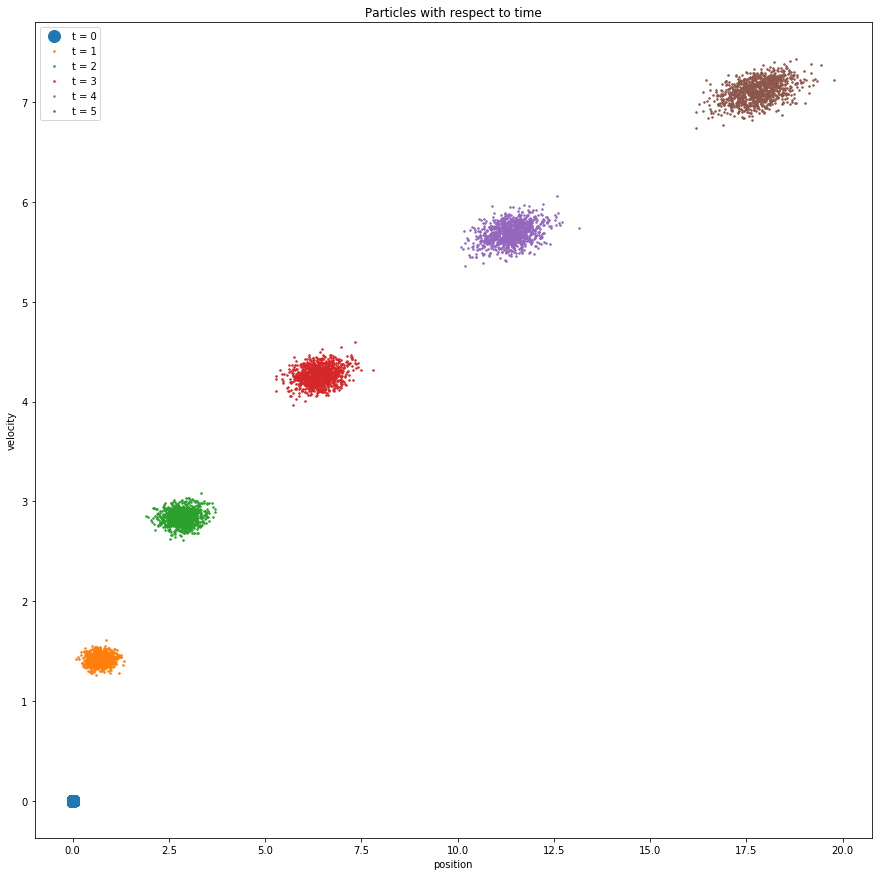

In [174]:
def particle_filter_prediction(particles,control,total_t):
    for j in range(total_t):
        for i in range(particles.shape[0]):
            particles[i] = sample_motion_model(control,np.reshape(particles[i],(-1,1)))
        
        plt.plot(particles[:,0], particles[:,1], 'o',markersize=1.5,label='t = {0}'.format(j+1))
    return particles    
N = 1000
particles = np.zeros((N,2))
accel = np.random.normal(size=1)
fig = plt.figure(figsize=(15,15))
plt.xlabel('position')
plt.ylabel('velocity')
plt.title('Particles with respect to time')
plt.plot(particles[:,0], particles[:,1], 'o',markersize=12,label='t = 0')
particles = particle_filter_prediction(particles,accel,5)
plt.legend()

In [175]:
def measurement_model(z,x):
    C = np.array([1,0])
    Q = 10 # measurement noise
    N = np.sqrt(2*3.14*Q)*np.exp(-1/(2*Q)*((C.dot(x)-z)**2));
    return N

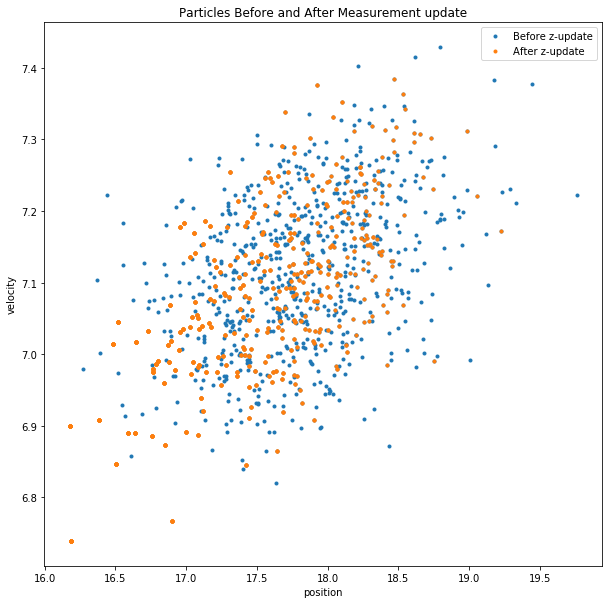

In [176]:
def particle_filter_measurement_update(particles,measurement):
    importance_factors = np.empty(shape=(particles.shape[0],1))
    plt.plot(particles[:,0], particles[:,1], 'o',markersize=3,label='Before z-update')
    for i in range(particles.shape[0]):
        importance_factors[i] = measurement_model(measurement,np.reshape(particles[i],(-1,1)))
    
    particles = low_variance_sampler(particles,importance_factors)
    plt.plot(particles[:,0], particles[:,1], 'o',markersize=3,label='After z-update')
fig = plt.figure(figsize=(10,10))
plt.xlabel('position')
plt.ylabel('velocity')
plt.title('Particles Before and After Measurement update')
measurement = 5.0
particle_filter_measurement_update(particles,measurement)
plt.legend()